# 원형 차트

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import sklearn.datasets

In [2]:
def get_iris_df():
    ds = sklearn.datasets.load_iris()
    df = pd.DataFrame(ds['data'], columns=ds['feature_names'])
    code_species_map = dict(zip(range(3), ds['target_names']))
    df['species'] = [code_species_map[c] for c in ds['target']]
    return df

df = get_iris_df()

### 모든 시각화는 같은 정보를 어떻게 하면 더 쉽게 이해할 수 있을까?라는 고민의 결과이다.

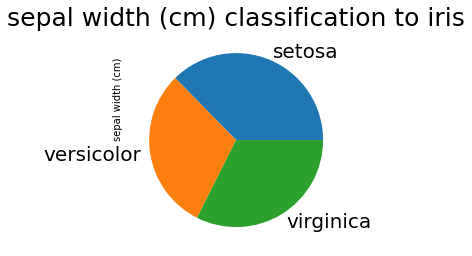

In [3]:
sums_by_species = df.groupby('species').sum()
var = "sepal width (cm)"
sums_by_species[var].plot(kind='pie', fontsize=20)
plt.ylabel(var, horizontalalignment='left')
plt.title(var+" classification to iris", fontsize=25)
plt.savefig('iris_pie_for_one_variable.png')
plt.show()
plt.close()

In [4]:
sums_by_species

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


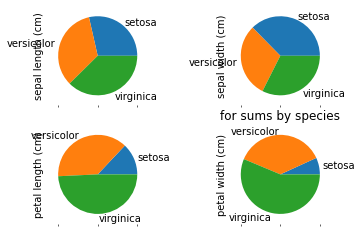

In [8]:
sums_by_species = df.groupby('species').sum()
sums_by_species.plot(kind='pie', subplots=True, layout=(-1,2), legend=False)
plt.title('for sums by species')
plt.savefig('iris_pie_for_each_variable.png')
plt.show()
plt.close()

# 막대 그래프

#### 상대적인 크기를 쉽게 비교할 수가 있음.

In [9]:
sums_by_species = df.groupby('species').sum()

In [10]:
sums_by_species

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


# matplotlib에서 한글 폰트 나오게 하기

> 출처 : https://data-science-hi.tistory.com/111

In [12]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


font_path = r'D:/font/NanumBarunpenB.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

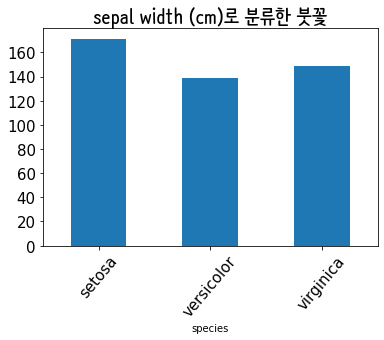

In [18]:
var = "sepal width (cm)"
sums_by_species[var].plot(kind='bar', fontsize=15, rot=50) # rot은 각 항목 이름의 글자회전 인것 같다.

plt.title(var+"로 분류한 붓꽃", fontsize=20, fontproperties=fontprop)
plt.savefig('iris_bar_for_one_variable.png')
plt.show()
plt.close()

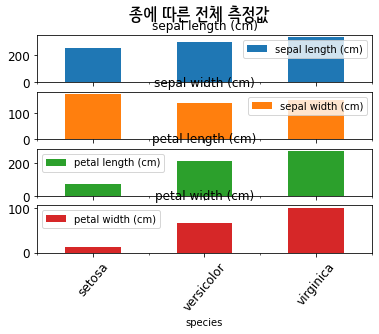

In [22]:
sums_by_species.plot(kind='bar', subplots=True, fontsize=12, rot = 50)
plt.suptitle('종에 따른 전체 측정값', fontproperties=fontprop)
plt.savefig('iris_bar_for_each_variable.png')
plt.show()
plt.close()

# 히스토그램

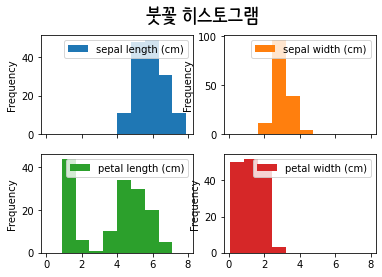

In [23]:
df.plot(kind='hist', subplots=True, layout=(2, 2))
plt.suptitle('붓꽃 히스토그램', fontsize=20, fontproperties=fontprop)
plt.show()

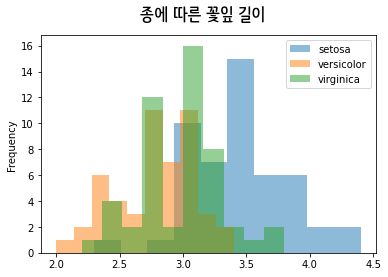

In [28]:
for spec in df['species'].unique():
    forspec = df[df['species']==spec]
    forspec[var].plot(kind='hist', alpha=0.5, label=spec)
    
plt.legend(loc='upper right')
plt.suptitle('종에 따른 꽃잎 길이', fontproperties=fontprop)
plt.savefig('iris_hist_by_spec')
plt.show()

# 상자 그림

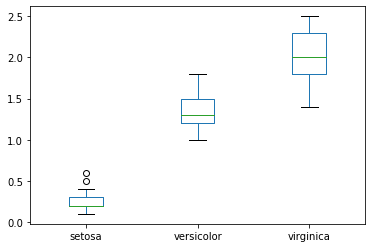

In [30]:
df['ind'] = pd.Series(df.index).apply(lambda i : i % 50)
df.pivot('ind', 'species')['petal width (cm)'].plot(kind='box')
plt.show()

# 산포도

Text(0.5, 1.0, '길이 대 너비')

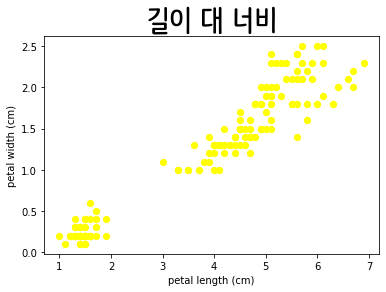

In [35]:
df.plot(kind='scatter',
       x='petal length (cm)', y='petal width (cm)', c="#FFFF00", s=39)
plt.title("길이 대 너비", fontsize = 30, fontproperties=fontprop)

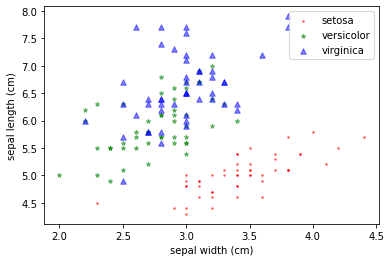

In [36]:
plt.close()
colors = ["r", "g", "b"]
markers = [".", "*", "^"]
fig, ax = plt.subplots(1, 1)
for i, spec in enumerate(df['species'].unique()):
    ddf = df[df['species']==spec]
    ddf.plot(kind='scatter',
            x="sepal width (cm)", y='sepal length (cm)', alpha=0.5, s=10*(i+1), ax=ax, color=colors[i],
            marker=markers[i], label=spec)

    
    
plt.legend()
plt.show()